# Examen TNS 2022-2023

## Evaluation
Vous serez évalué par groupe de 2 (à l'exception d'un groupe 3) sous la forme d'un rapport où vous présenterez vos travaux. La présentation se fera en détaillant votre approche du problème, vos choix méthodologiques et le notebook. La note sera principalement basée sur votre capacité à restituer de façon claire les notions de cours. Il est donc essentiel d'introduire dans le notebook et votre rapport la logique de votre travail.

Le notebook et le rapport devront être transmis par e-mail guillaume.terrasse@edf.fr

Les données devront mettre en oeuvre des traitements relatifs au cours TNS (donc essentiellement sur des signaux et non des méthodes de traitement d'image)

## Description de l'examen
L'examen a pour but de traiter un radargram c'est-à-dire les données acquises par un géoradar.

Le géoradar est composé d’un châssis équipé de deux ou quatre roues sur lequel est posé en son centre l’antenne émettrice ('E') et l’antenne réceptrice ('R') très proches du sol. Il dispose également d’un odomètre qui positionne spatialement les réflexions enregistrées sous forme de signal 1D.

<img src="img/Georadar.PNG" style="height:200px">

Le géoradar émet une onde électromagnétique dans le sol sous forme de brèves impulsions à intervalle
régulier. La forme de l’impulsion émise ressemble à une ondelette de Ricker. Lorsque l’onde rencontre une discontinuité, qui se traduit par une différence de permittivité diélectrique entre deux milieux, une partie de l’énergie est réfléchie et une autre transmise. L’ensemble des ondes réfléchies parvenant jusqu’à l’antenne réceptrice est enregistré en fonction du temps.
À chaque impulsion émise, une réponse que l’on appelle trace (ou A-Scan), est stockée sous forme de signal monodimensionnel. L’opérateur, en déplaçant le géoradar va collecter un ensemble de traces qui formeront un radargram (ou B-Scan)

<img src="img/fonctionnement_georadar2.PNG" style="height:350px">

## Les données
Pour le radargram traité, les signaux sont enregistrés pendant 62 ns et la longueur de déplacement est de 13 m.

 ### Clutter
La configuration d’antenne avec l’émetteur et le récepteur à la fois très proche l’un de l’autre et très proche du sol implique qu’un premier enregistrement survient très rapidement, appelé **onde directe**. L’**onde directe** est très peu atténuée et par conséquent le signal enregistré a une très forte amplitude. De plus, la multiple-réverbération de l’onde avec la surface fait apparaître des formes très horizontales en arrière-plan qui se répètent verticalement sur le radargram, appelé **ringing** en anglais.

### Bruit
Le **bruit** provient de perturbations aléatoires issues des appareils de mesures. Du fait de la très large bande passante de l’antenne, le bruit peut également apparaitre à la suite de l’enregistrement des signaux provenant des ondes électromagnétiques
dans l’air issues des antennes de radio-transmission et des appareils téléphoniques. Dans ce dernier cas des **artefacts en forme de colonne** apparaissent sur les données. Le **bruit** apparait essentiellement en fin d’enregistrement d’une trace en l’absence d’information et rehaussé par le gain appliqué en profondeur.

<img src="img/artefacts.PNG" style="height:200px">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
import scipy.io

gprdata = scipy.io.loadmat("DZT_GDF001.mat")

radargram = gprdata["radarDZT"]


In [3]:
RECORD_TIME = 62 # nanoseconds (ns)
RECORD_LENGTH = 13 # meters (m)
RADARGRAM_HEIGHT, RADARGRAM_WIDTH = radargram.shape

SAMPLE_SPACING = RECORD_TIME / RADARGRAM_WIDTH
SAMPLE_RATE = 1 / SAMPLE_SPACING

In [4]:
# Change height index to time in nanoseconds
def index_to_time(index):
    return index / RADARGRAM_HEIGHT * RECORD_TIME # ns

In [5]:
# Change width index to distance in meters
def index_to_meters(index):
    return index / RADARGRAM_WIDTH * RECORD_LENGTH # m

Text(0.5, 1.0, 'Trace (0.762 m)')

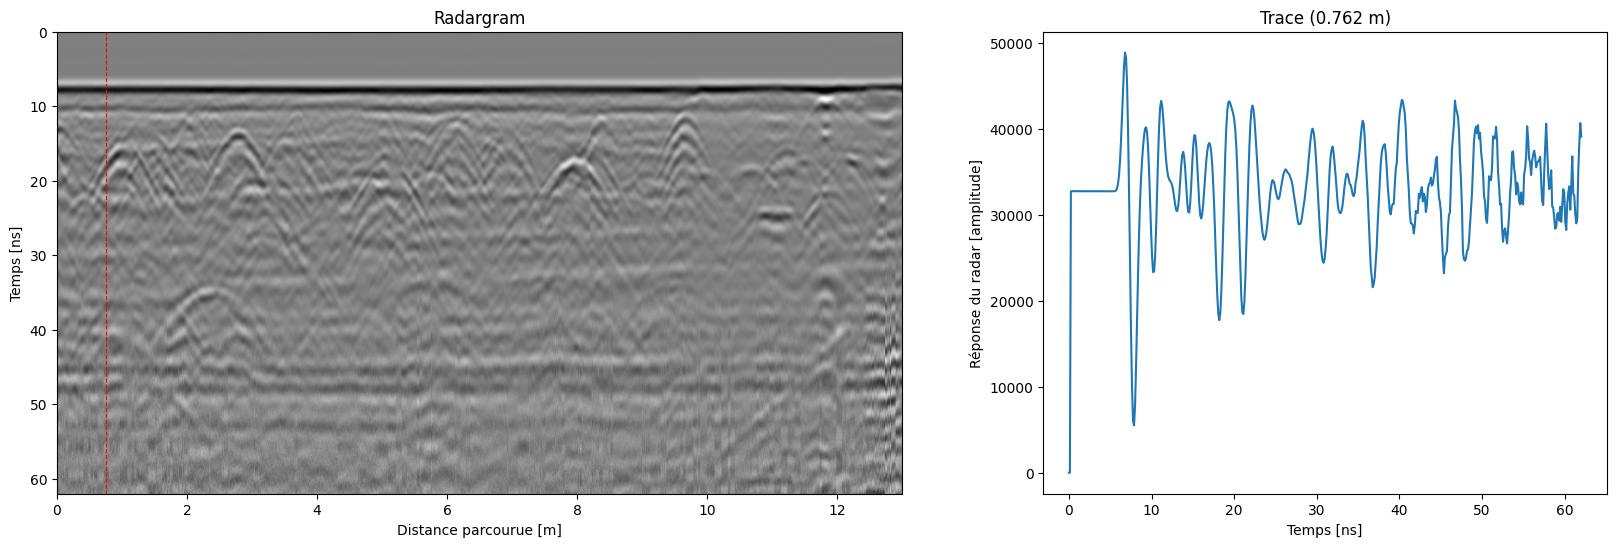

In [215]:
# Chargement d'un radargram
i = 100
x = radargram[:, i]
t = np.linspace(0, 62, x.size)  # ecoute pendant 62 ns

fig, ax = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={"width_ratios": [1.5, 1]})
ax[0].imshow(radargram, "gray", extent=[0, 13, 62, 0], aspect="auto")  # illustration du radargram
ax[0].set_xlabel("Distance parcourue [m]")
ax[0].set_ylabel("Temps [ns]")
ax[0].set_title("Radargram")
ax[0].axvline(index_to_meters(i), 0, radargram.shape[0], color="r", linestyle="--", linewidth=0.8)
ax[1].plot(t, x)  # chaque colonne du radargram correspond à un signal
ax[1].set_xlabel("Temps [ns]")
ax[1].set_ylabel("Réponse du radar [amplitude]")
ax[1].set_title(f"Trace ({index_to_meters(i):0.3f} m)")


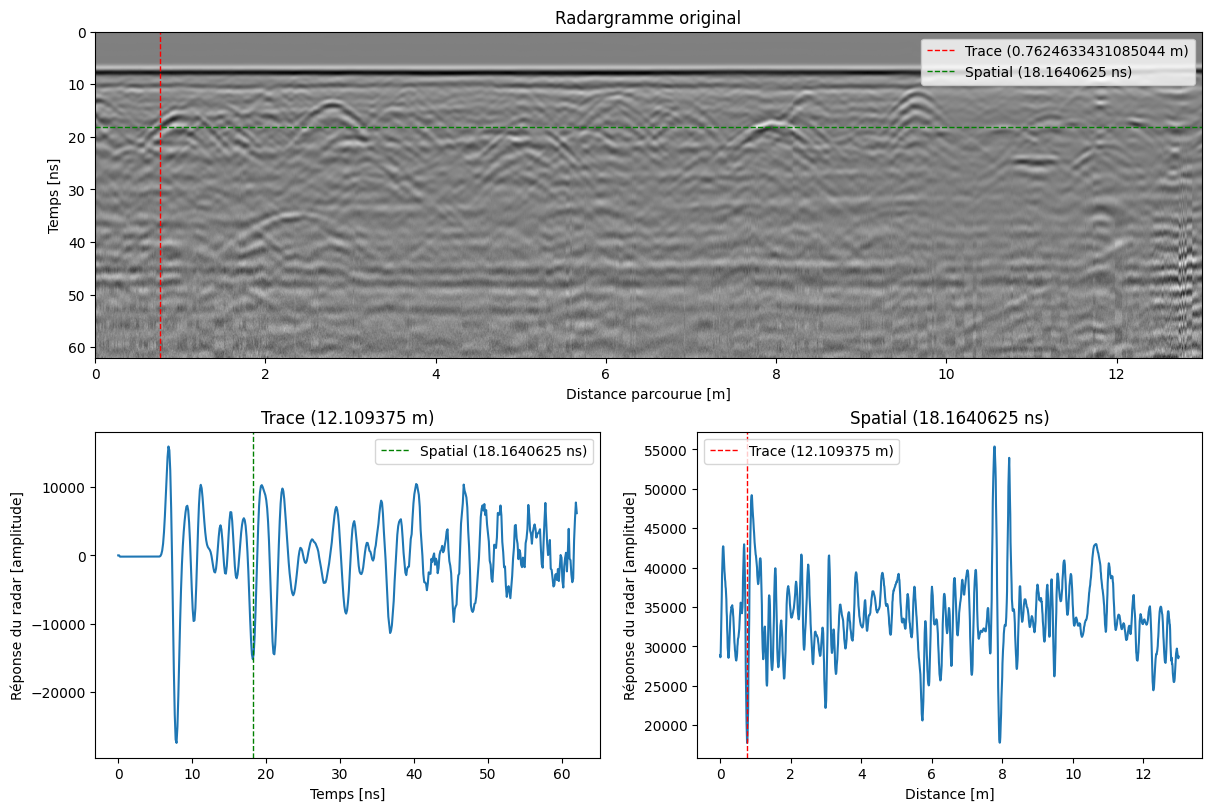

In [203]:
i = 100
j = 150
d = np.linspace(0, RECORD_LENGTH, RADARGRAM_WIDTH)  # ecoute pendant 62 ns

trace_signal = radargram[:, i]
trace_signal = trace_signal - np.mean(trace_signal)  # on soustrait la valeur moyenne pour centrer le signal
trace_signal[:2] = 0

spatial_signal = radargram[j]

fig = plt.figure(constrained_layout=True, figsize=(12, 8))
gs = fig.add_gridspec(nrows=2, ncols=2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[-1, 0])
ax3 = fig.add_subplot(gs[-1, 1])

#fig, ax = plt.subplots(2, 2, figsize=(20, 10), layout="constrained") #, gridspec_kw={"width_ratios": [1.5, 1, 1]})
ax1.imshow(radargram, "gray", extent=[0, 13, 62, 0], aspect="auto")  # illustration du radargram
ax1.set_xlabel("Distance parcourue [m]")
ax1.set_ylabel("Temps [ns]")
ax1.set_title("Radargramme original")
ax1.axvline(index_to_meters(i), 0, radargram.shape[0], color="r", linestyle="--", linewidth=1, label=f"Trace ({index_to_meters(i)} m)")
ax1.axhline(index_to_time(j), 0, radargram.shape[0], color="g", linestyle="--", linewidth=1, label=f"Spatial ({index_to_time(j)} ns)")
ax1.legend()

ax2.plot(t, trace_signal)  # chaque colonne du radargram correspond à un signal
ax2.set_xlabel("Temps [ns]")
ax2.set_ylabel("Réponse du radar [amplitude]")
ax2.set_title(f"Trace ({index_to_time(i)} m)")
ax2.axvline(index_to_time(j), 0, radargram.shape[0], color="g", linestyle="--", linewidth=1, label=f"Spatial ({index_to_time(j)} ns)")
ax2.legend()

ax3.plot(d, spatial_signal)  # chaque ligne du radargram correspond à un signal
ax3.set_xlabel("Distance [m]")
ax3.set_ylabel("Réponse du radar [amplitude]")
ax3.set_title(f"Spatial ({index_to_time(j)} ns)")
ax3.axvline(index_to_meters(i), 0, radargram.shape[0], color="r", linestyle="--", linewidth=1, label=f"Trace ({index_to_time(i)} m)")
ax3.legend()

plt.show()

## Analyse spectrale
A faire selon l'axe temporel et l'axe spatial en 1D

Tracez-le spectre, analysez-le et mettez en place un moyen d'identifier les bandes spectrales correspondants au clutter, le ringing et bruit qui seront à supprimer par la suite

## Traitement des données

Développer un ou plusieurs traitements consistant à supprimer le bruit et le clutter dans les données

## FFT helpers

In [7]:
# Calcul de la transformée de Fourier
def fft(x):
  ft = np.fft.rfft(x)
  module = np.abs(ft)
  phase = np.angle(ft)
  freq = np.fft.rfftfreq(x.size, d=SAMPLE_SPACING)
  return module, phase, freq

In [8]:
# Calcul de la transformée de Fourier inverse
def ifft(module, phase, length):
  ft = module * np.exp(1j * phase)
  return np.fft.irfft(ft, length)

## Centrage des traces

In [9]:
trace = radargram[:, i]
trace_centered = trace - trace.mean()  # soustraction de la valeur moyenne

module, phase, freq = fft(trace)
module_, phase_, freq_ = fft(trace_centered)

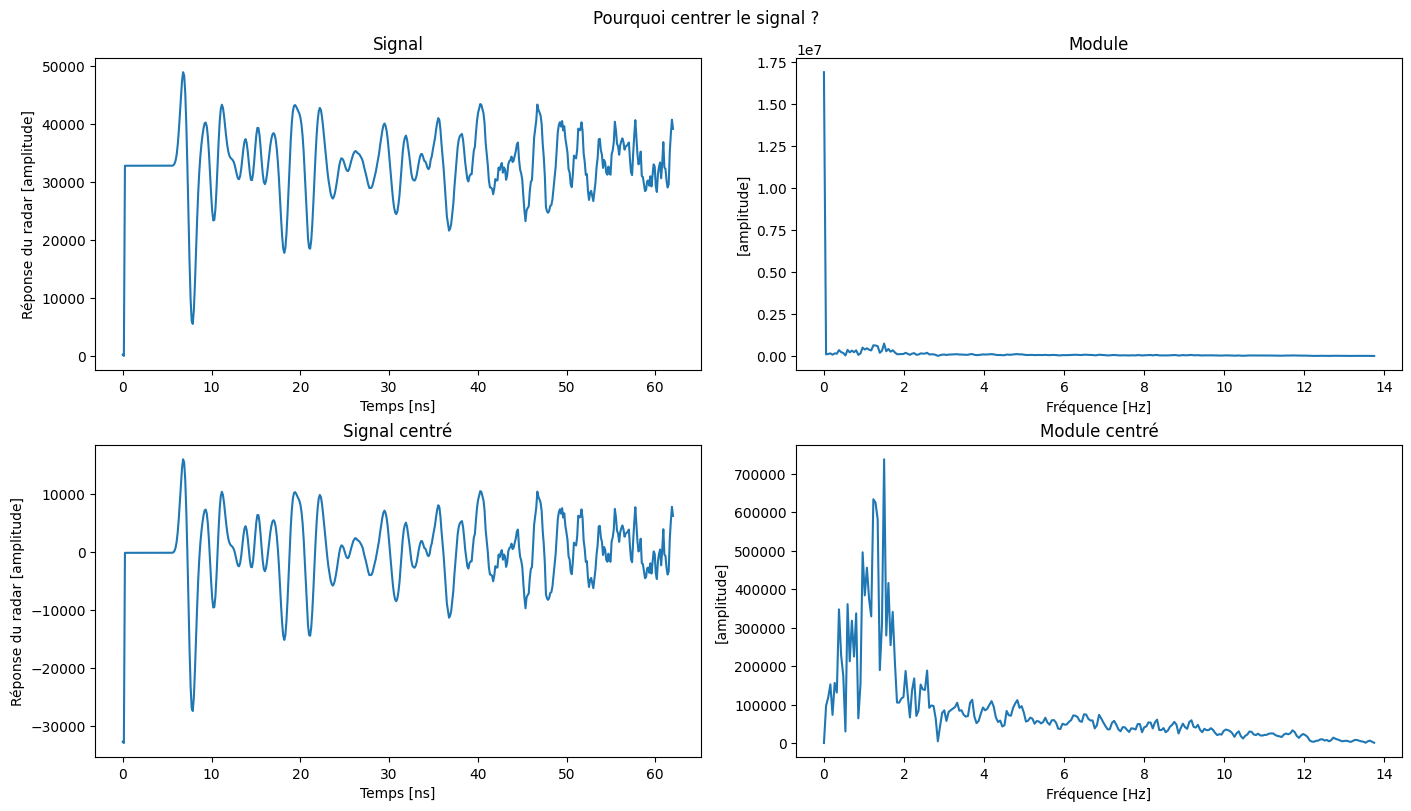

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8), layout="constrained")

ax[0, 0].plot(t, trace)
ax[0, 0].set_title("Signal")
ax[0, 0].set_xlabel("Temps [ns]")
ax[0, 0].set_ylabel("Réponse du radar [amplitude]")

ax[0, 1].plot(freq, module)
ax[0, 1].set_title("Module")
ax[0, 1].set_xlabel("Fréquence [Hz]")
ax[0, 1].set_ylabel("[amplitude]")

ax[1, 0].plot(t, trace_centered)
ax[1, 0].set_title("Signal centré")
ax[1, 0].set_xlabel("Temps [ns]")
ax[1, 0].set_ylabel("Réponse du radar [amplitude]")

ax[1, 1].plot(freq_, module_)
ax[1, 1].set_title("Module centré")
ax[1, 1].set_xlabel("Fréquence [Hz]")
ax[1, 1].set_ylabel("[amplitude]")

fig.suptitle("Pourquoi centrer le signal ?")
plt.show()

Comme on peut le voir ci-dessus, on centre le signal pour que la valeur moyenne soit nulle. Cela évite d'écraser les amplitudes des fréquences intéressantes par la valeur moyenne du signal.

### Low pass filter

In [11]:
module, phase, freq = fft(trace_centered)

# Filtrage passe-bas, on supprime les fréquences supérieures à 3 Hz
module_low_pass = module.copy()
module_low_pass[freq > 3] = 0

trace_low_pass = ifft(module_low_pass, phase, trace_centered.size)

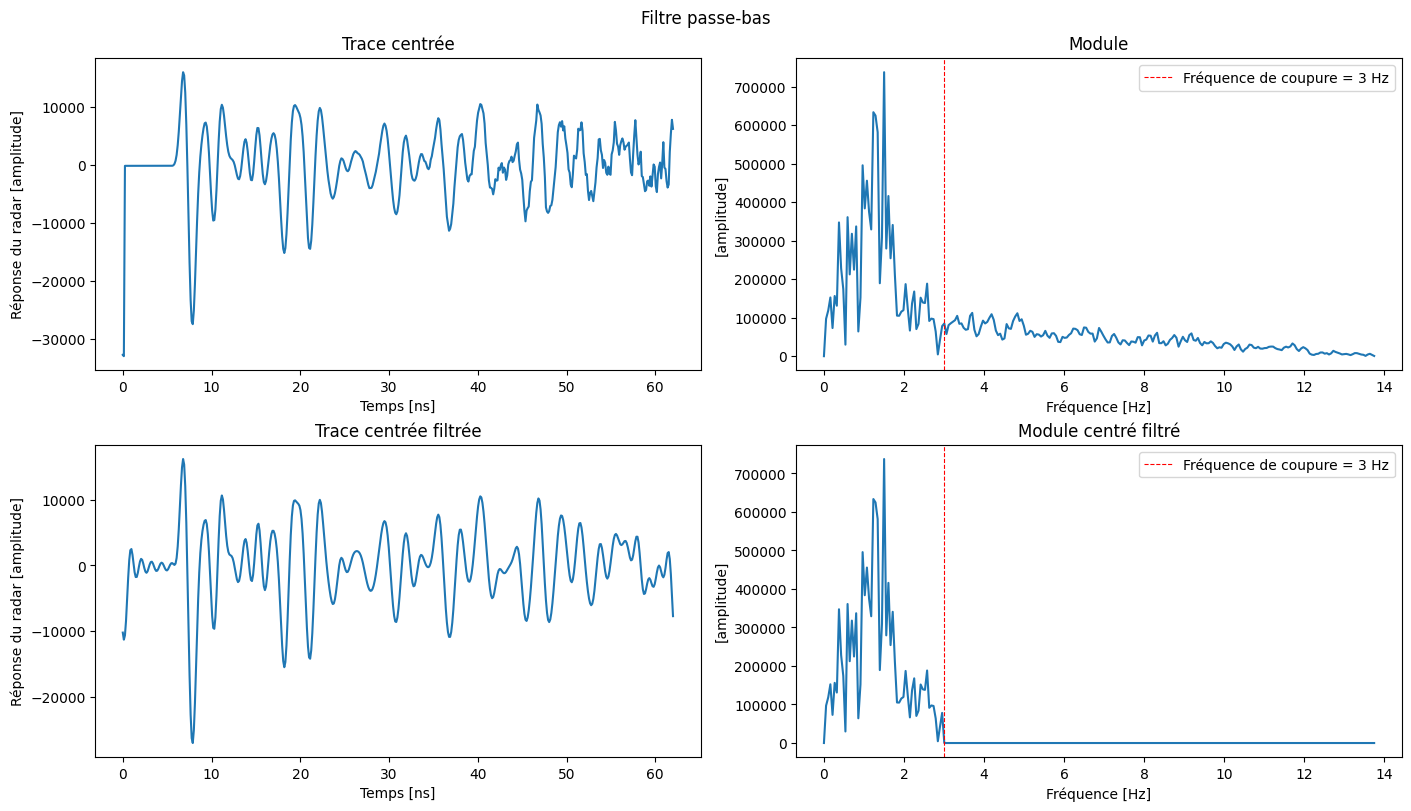

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8), layout="constrained")

ax[0, 0].plot(t, trace_centered)
ax[0, 0].set_title("Trace centrée")
ax[0, 0].set_xlabel("Temps [ns]")
ax[0, 0].set_ylabel("Réponse du radar [amplitude]")

ax[0, 1].plot(freq, module)
ax[0, 1].set_title("Module")
ax[0, 1].set_xlabel("Fréquence [Hz]")
ax[0, 1].set_ylabel("[amplitude]")
ax[0, 1].axvline(3, 0, 1, color="r", linestyle="--", linewidth=0.8, label="Fréquence de coupure = 3 Hz")
ax[0, 1].legend()

ax[1, 0].plot(t, trace_low_pass)
ax[1, 0].set_title("Trace centrée filtrée")
ax[1, 0].set_xlabel("Temps [ns]")
ax[1, 0].set_ylabel("Réponse du radar [amplitude]")

ax[1, 1].plot(freq, module_low_pass)
ax[1, 1].set_title("Module centré filtré")
ax[1, 1].set_xlabel("Fréquence [Hz]")
ax[1, 1].set_ylabel("[amplitude]")
ax[1, 1].axvline(3, 0, 1, color="r", linestyle="--", linewidth=0.8, label="Fréquence de coupure = 3 Hz")
ax[1, 1].legend()

fig.suptitle("Filtre passe-bas")
plt.show()

Définissons une fonction pour appliquer un tel filtre dans la suite du notebook :

In [13]:
# Low pass filter function
def low_pass_filter(signal, max_freq):
    module, phase, freq = fft(signal)
    module[freq > max_freq] = 0
    return ifft(module, phase, signal.size)

### High pass filter

In [14]:
module, phase, freq = fft(trace_centered)

# Filtrage passe-bas, on supprime les fréquences inférieures à 1 Hz
module_low_pass = module.copy()
module_low_pass[freq < 1] = 0

trace_low_pass = ifft(module_low_pass, phase, trace_centered.size)

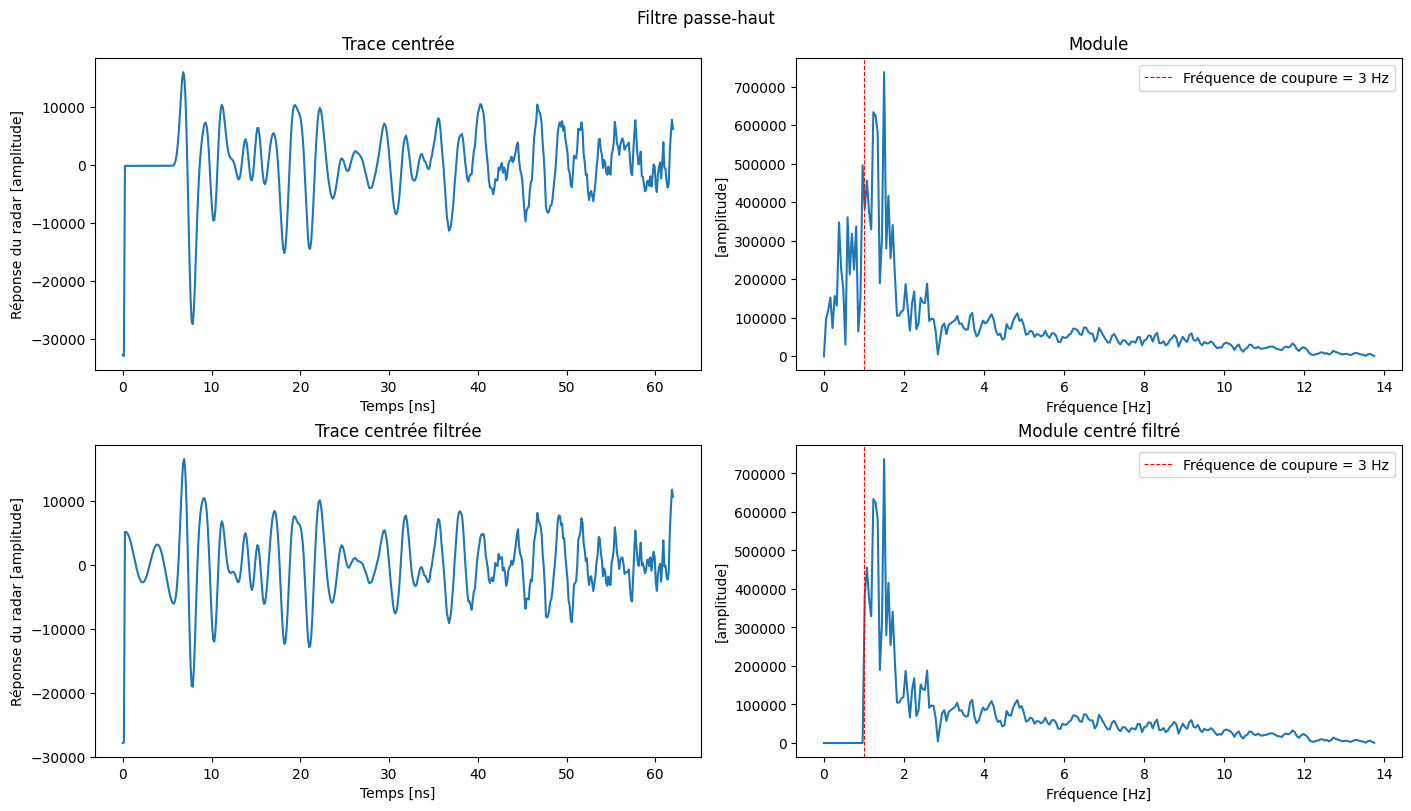

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8), layout="constrained")

ax[0, 0].plot(t, trace_centered)
ax[0, 0].set_title("Trace centrée")
ax[0, 0].set_xlabel("Temps [ns]")
ax[0, 0].set_ylabel("Réponse du radar [amplitude]")

ax[0, 1].plot(freq, module)
ax[0, 1].set_title("Module")
ax[0, 1].set_xlabel("Fréquence [Hz]")
ax[0, 1].set_ylabel("[amplitude]")
ax[0, 1].axvline(1, 0, 1, color="r", linestyle="--", linewidth=0.8, label="Fréquence de coupure = 3 Hz")
ax[0, 1].legend()

ax[1, 0].plot(t, trace_low_pass)
ax[1, 0].set_title("Trace centrée filtrée")
ax[1, 0].set_xlabel("Temps [ns]")
ax[1, 0].set_ylabel("Réponse du radar [amplitude]")

ax[1, 1].plot(freq, module_low_pass)
ax[1, 1].set_title("Module centré filtré")
ax[1, 1].set_xlabel("Fréquence [Hz]")
ax[1, 1].set_ylabel("[amplitude]")
ax[1, 1].axvline(1, 0, 1, color="r", linestyle="--", linewidth=0.8, label="Fréquence de coupure = 3 Hz")
ax[1, 1].legend()

fig.suptitle("Filtre passe-haut")
plt.show()

Définissons une fonction pour appliquer un tel filtre dans la suite du notebook :

In [16]:
# Low pass filter function
def high_pass_filter(signal, min_freq):
    module, phase, freq = fft(signal)
    module[freq > min_freq] = 0
    return ifft(module, phase, signal.size)

### Band pass filter

In [17]:
module, phase, freq = fft(trace_centered)

# Filtrage passe-bancde, on supprime les fréquences inférieures à 1 Hz et supérieures à 3 Hz
module_band_pass = module.copy()
#module_band_pass[(freq < 1) | (freq > 3)] = 0
module_band_pass[(freq < 1) | (freq > 3)] = 0

trace_band_pass = ifft(module_band_pass, phase, trace_centered.size)

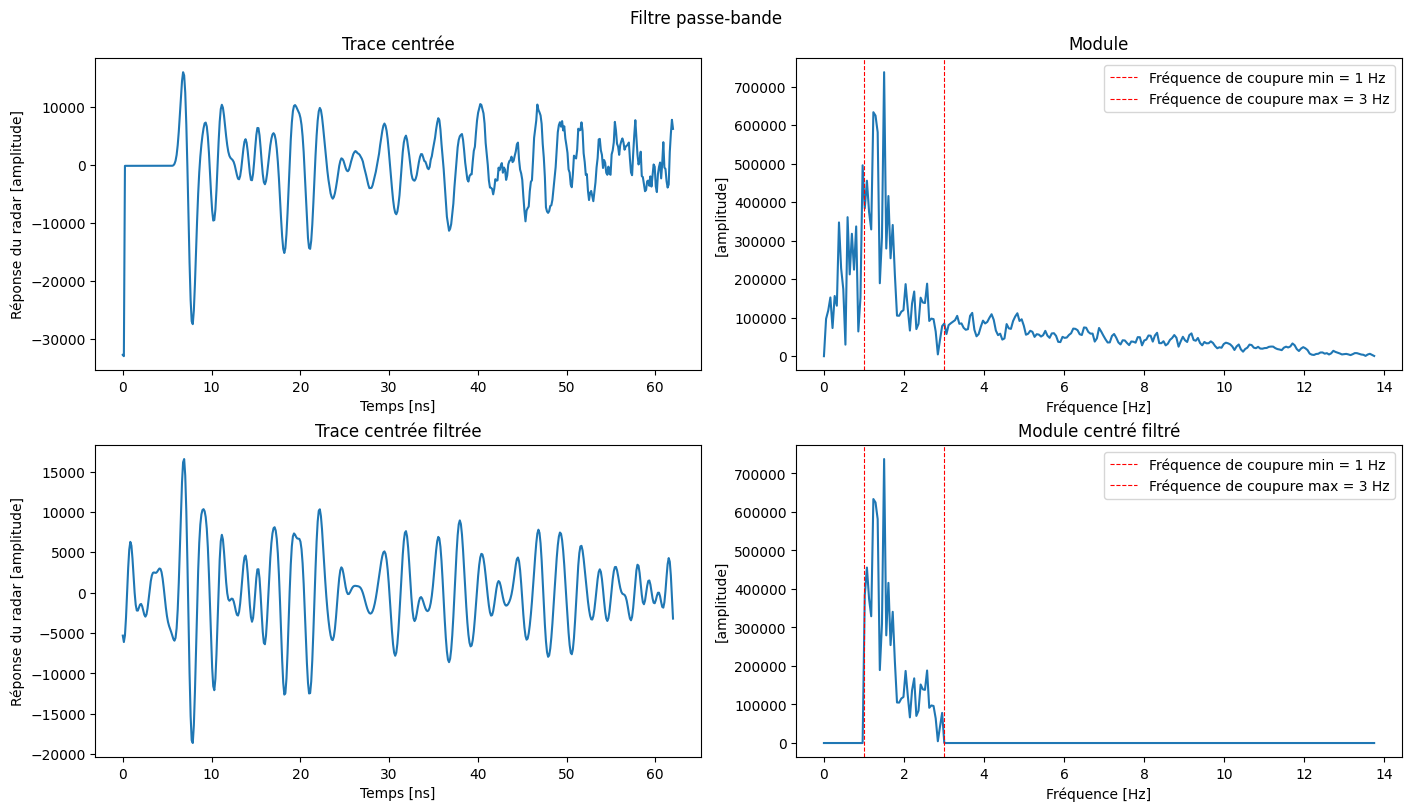

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8), layout="constrained")

ax[0, 0].plot(t, trace_centered)
ax[0, 0].set_title("Trace centrée")
ax[0, 0].set_xlabel("Temps [ns]")
ax[0, 0].set_ylabel("Réponse du radar [amplitude]")

ax[0, 1].plot(freq, module)
ax[0, 1].set_title("Module")
ax[0, 1].set_xlabel("Fréquence [Hz]")
ax[0, 1].set_ylabel("[amplitude]")
ax[0, 1].axvline(1, 0, 1, color="r", linestyle="--", linewidth=0.8, label="Fréquence de coupure min = 1 Hz")
ax[0, 1].axvline(3, 0, 1, color="r", linestyle="--", linewidth=0.8, label="Fréquence de coupure max = 3 Hz")
ax[0, 1].legend()

ax[1, 0].plot(t, trace_band_pass)
ax[1, 0].set_title("Trace centrée filtrée")
ax[1, 0].set_xlabel("Temps [ns]")
ax[1, 0].set_ylabel("Réponse du radar [amplitude]")

ax[1, 1].plot(freq, module_band_pass)
ax[1, 1].set_title("Module centré filtré")
ax[1, 1].set_xlabel("Fréquence [Hz]")
ax[1, 1].set_ylabel("[amplitude]")
ax[1, 1].axvline(1, 0, 1, color="r", linestyle="--", linewidth=0.8, label="Fréquence de coupure min = 1 Hz")
ax[1, 1].axvline(3, 0, 1, color="r", linestyle="--", linewidth=0.8, label="Fréquence de coupure max = 3 Hz")
ax[1, 1].legend()

fig.suptitle("Filtre passe-bande")
plt.show()

Définissons une fonction pour appliquer un tel filtre dans la suite du notebook :

In [19]:
# Band pass filter function using np.fft.fft result
def band_pass_filter(signal, min_freq, max_freq):
    module, phase, freq = fft(signal)
    # Filtrage passe-bancde, on supprime les fréquences inférieures à 1 Hz et supérieures à 3 Hz
    module[(freq < min_freq) | (freq > max_freq)] = 0
    return ifft(module, phase, signal.size)

## Radargramme

## Affichage

In [56]:
def plot_radargram(radargram, radargram_corrected, i=100, j=150):

  d = np.linspace(0, RECORD_LENGTH, RADARGRAM_WIDTH)  # ecoute pendant 62 ns

  trace_signal = radargram[:, i]
  trace_signal = trace_signal - np.mean(trace_signal)  # on soustrait la valeur moyenne pour centrer le signal
  trace_signal[:2] = 0

  spatial_signal = radargram[j]

  fig, ax = plt.subplots(3, 3, figsize=(20, 10), layout="constrained", gridspec_kw={"width_ratios": [1.5, 1, 1]})
  ax[0, 0].imshow(radargram, "gray", extent=[0, 13, 62, 0], aspect="auto")  # illustration du radargram
  ax[0, 0].set_xlabel("Distance parcourue [m]")
  ax[0, 0].set_ylabel("Temps [ns]")
  ax[0, 0].set_title("Radargramme original")
  ax[0, 0].axvline(index_to_meters(i), 0, radargram.shape[0], color="r", linestyle="--", linewidth=1)
  ax[0, 0].axhline(index_to_time(j), 0, radargram.shape[0], color="g", linestyle="--", linewidth=1)

  ax[0, 1].plot(t, trace_signal)  # chaque colonne du radargram correspond à un signal
  ax[0, 1].set_xlabel("Temps [ns]")
  ax[0, 1].set_ylabel("Réponse du radar [amplitude]")
  ax[0, 1].set_title(f"Trace originale (x={i})")
  ax[0, 1].axvline(index_to_time(j), 0, radargram.shape[0], color="g", linestyle="--", linewidth=1)

  ax[0, 2].plot(d, spatial_signal)  # chaque ligne du radargram correspond à un signal
  ax[0, 2].set_xlabel("Distance [m]")
  ax[0, 2].set_ylabel("Réponse du radar [amplitude]")
  ax[0, 2].set_title(f"Spatial original (y={j})")
  ax[0, 2].axvline(index_to_meters(i), 0, radargram.shape[0], color="r", linestyle="--", linewidth=1)


  ax[1, 0].imshow(radargram_corrected, "gray", extent=[0, 13, 62, 0], aspect="auto")  # illustration du radargram
  ax[1, 0].set_xlabel("Distance parcourue [m]")
  ax[1, 0].set_ylabel("Temps [ns]")
  ax[1, 0].set_title("Radargramme corrigé")
  ax[1, 0].axvline(index_to_meters(i), 0, radargram.shape[0], color="r", linestyle="--", linewidth=1)
  ax[1, 0].axhline(index_to_time(j), 0, radargram.shape[0], color="g", linestyle="--", linewidth=1)

  ax[1, 1].plot(t, radargram_corrected[:, i])  # chaque colonne du radargram correspond à un signal
  ax[1, 1].set_xlabel("Temps [ns]")
  ax[1, 1].set_ylabel("Réponse du radar [amplitude]")
  ax[1, 1].set_title(f"Trace corrigée (x={i})")
  ax[1, 1].axvline(index_to_time(j), 0, radargram.shape[0], color="g", linestyle="--", linewidth=1)

  ax[1, 2].plot(d, radargram_corrected[j])  # chaque ligne du radargram correspond à un signal
  ax[1, 2].set_xlabel("Distance [m]")
  ax[1, 2].set_ylabel("Réponse du radar [amplitude]")
  ax[1, 2].set_title(f"Spatial corrigé (y={j})")
  ax[1, 2].axvline(index_to_meters(i), 0, radargram.shape[0], color="r", linestyle="--", linewidth=1)

  difference = radargram - radargram_corrected

  ax[2, 0].imshow(difference, "gray", extent=[0, 13, 62, 0], aspect="auto")  # illustration du radargram
  ax[2, 0].set_xlabel("Distance parcourue [m]")
  ax[2, 0].set_ylabel("Temps [ns]")
  ax[2, 0].set_title("Différence")
  ax[2, 0].axvline(index_to_meters(i), 0, radargram.shape[0], color="r", linestyle="--", linewidth=1)
  ax[2, 0].axhline(index_to_time(j), 0, radargram.shape[0], color="g", linestyle="--", linewidth=1)

  ax[2, 1].plot(t, trace_signal - radargram_corrected[:, i])  # chaque colonne du radargram correspond à un signal
  ax[2, 1].set_xlabel("Temps [ns]")
  ax[2, 1].set_ylabel("Réponse du radar [amplitude]")
  ax[2, 1].set_title(f"Différence traces (x={i})")
  ax[2, 1].axvline(index_to_time(j), 0, radargram.shape[0], color="g", linestyle="--", linewidth=1)

  ax[2, 2].plot(d, spatial_signal - radargram_corrected[j])  # chaque ligne du radargram correspond à un signal
  ax[2, 2].set_xlabel("Distance [m]")
  ax[2, 2].set_ylabel("Réponse du radar [amplitude]")
  ax[2, 2].set_title(f"Différence spatial (y={j})")
  ax[2, 2].axvline(index_to_meters(i), 0, radargram.shape[0], color="r", linestyle="--", linewidth=1)

### Suppression du clutter et du ringing

Pour atténuer l'effet du ringing dans notre cas nous avons essayé deux méthodes :

- On considère que les lignes horizontales sur notre radargramme sont en fait des ondes de très basses fréquence. Ainsi, pour les retirer, on peut utiliser un filtre passe-haut suivant l'axe spatial.

- Cette méthode fonctionne mais pour ne pas perdre d'informations importantes sur le signal, il faut utiliser une fréquence de coupure pour le filtre très basse. Elle est si faible qu'elle se rapproche très fortement de 0. On peut donc remplacer ce filtre passe-haut par une simple suppression de la moyenne du signal suivant l'axe spatial. Cette méthode étant plus simple et plus optimisée, c'est celle que nous conservons.

In [57]:
def ringing_clutter(radargram):
    radargram_corrected = np.array([line - line.mean() for line in radargram])
    return radargram_corrected

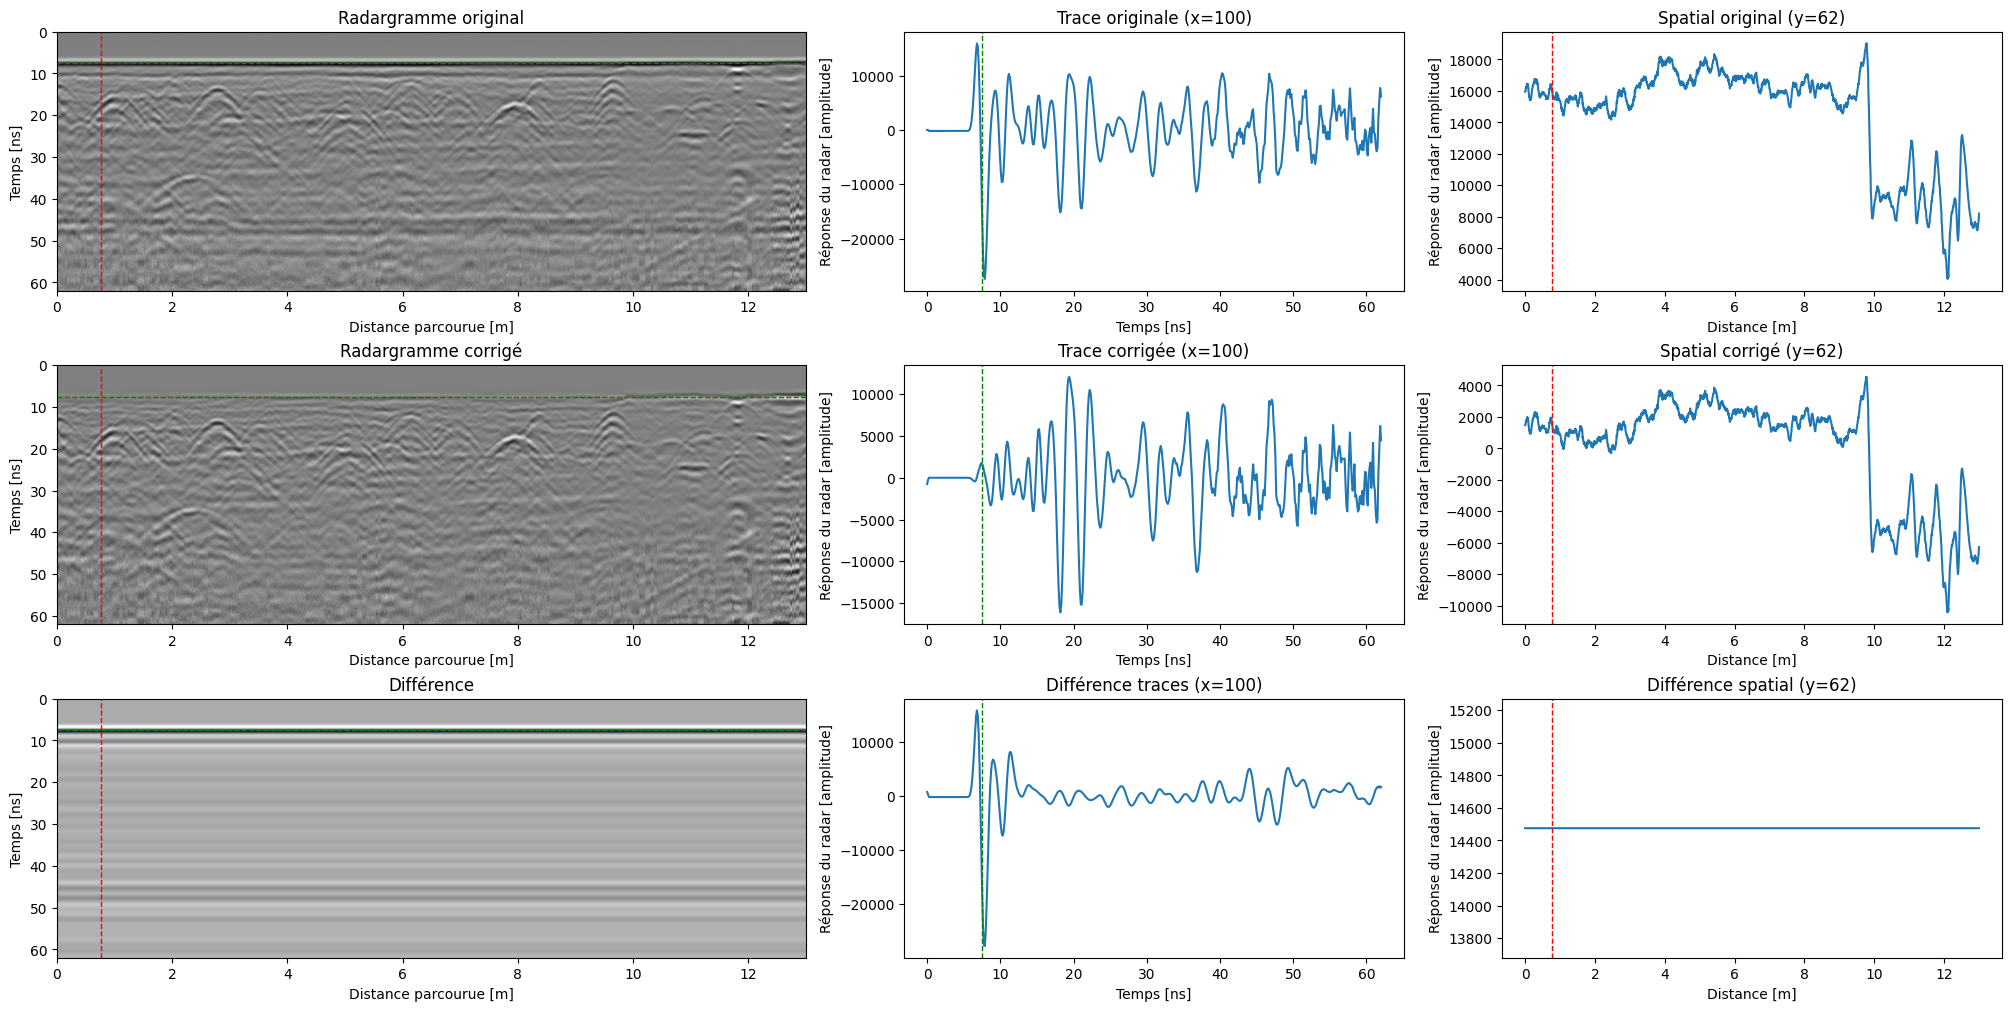

In [58]:
plot_radargram(radargram, ringing_clutter(radargram), j=62)

⚠️ - À la représentation de la différence du signal spatial. On pourrait croire que le signal n'a pas subi de modification, mais il faut faire attention aux valeurs des ordonnées. Nous voyons d'ailleurs bien dans la différence du radargramme qu'il y a bien des modifications.

Sur la différence du radargramme, on voit très clairement les lignes de ringin et clutter apparaître prouvant que nous avons bien atténué leur effet. Elles sont d'ailleurs beaucoup moins marquées sur le radargramme corrigé.

### Suppression du bruit

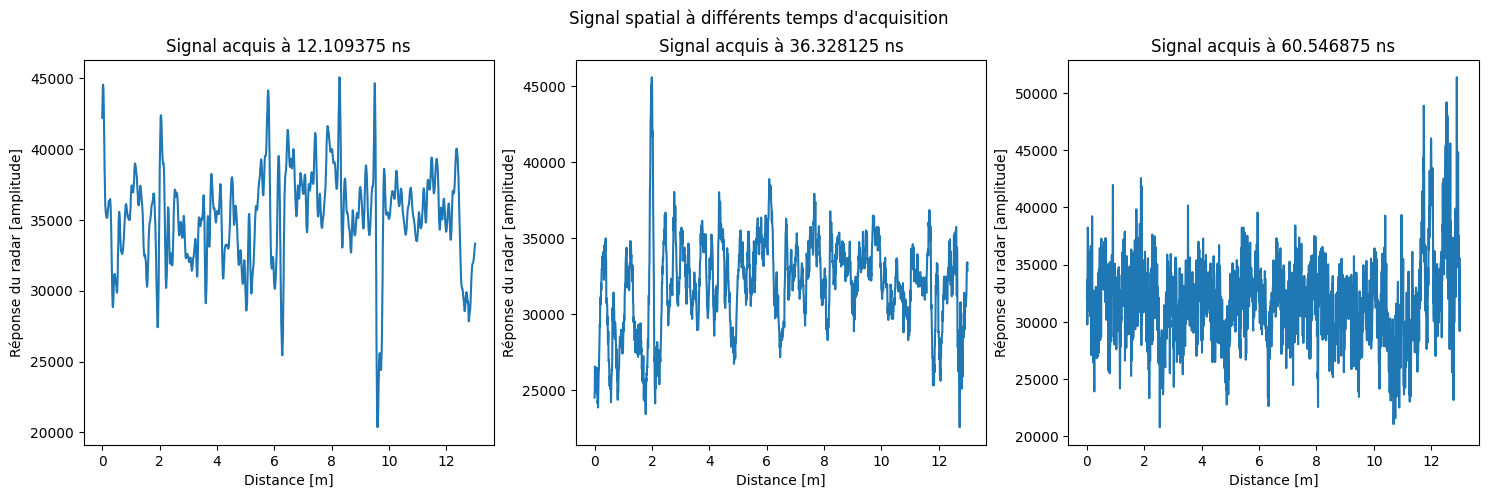

In [71]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

d = np.linspace(0, RECORD_LENGTH, RADARGRAM_WIDTH)

i1 = str(index_to_time(100))
i2 = str(index_to_time(300))
i3 = str(index_to_time(500))

ax[0].plot(d, radargram[100])
ax[0].set_title("Signal acquis à " + i1 + " ns")
ax[0].set_xlabel("Distance [m]")
ax[0].set_ylabel("Réponse du radar [amplitude]")

ax[1].plot(d, radargram[300])
ax[1].set_title("Signal acquis à " + i2 + " ns")
ax[1].set_xlabel("Distance [m]")
ax[1].set_ylabel("Réponse du radar [amplitude]")

ax[2].plot(d, radargram[500])
ax[2].set_title("Signal acquis à " + i3 + " ns")
ax[2].set_xlabel("Distance [m]")
ax[2].set_ylabel("Réponse du radar [amplitude]")

fig.suptitle("Signal spatial à différents temps d'acquisition")
plt.show()

On voit clairement sur le graphique précédent que plus le signal est acquis tard (et donc profondémment dans le sol), plus il est bruité. On remarque que le bruit s'exprime par des signaux de haute fréquence. Pour l'atténuer, nous allons donc utiliser un filtre passe-bas afin d'éliminer les hautes fréquences.

In [184]:
spatial_signal = radargram[500]
spatial_signal = spatial_signal - spatial_signal.mean()

module, phase, freq = fft(spatial_signal)

# Filtrage passe-bas, on supprime les fréquences supérieures à 2 Hz
module_low_pass = module.copy()
module_low_pass[freq > 2] = 0

spatial_signal_low_pass = ifft(module_low_pass, phase, spatial_signal.size)

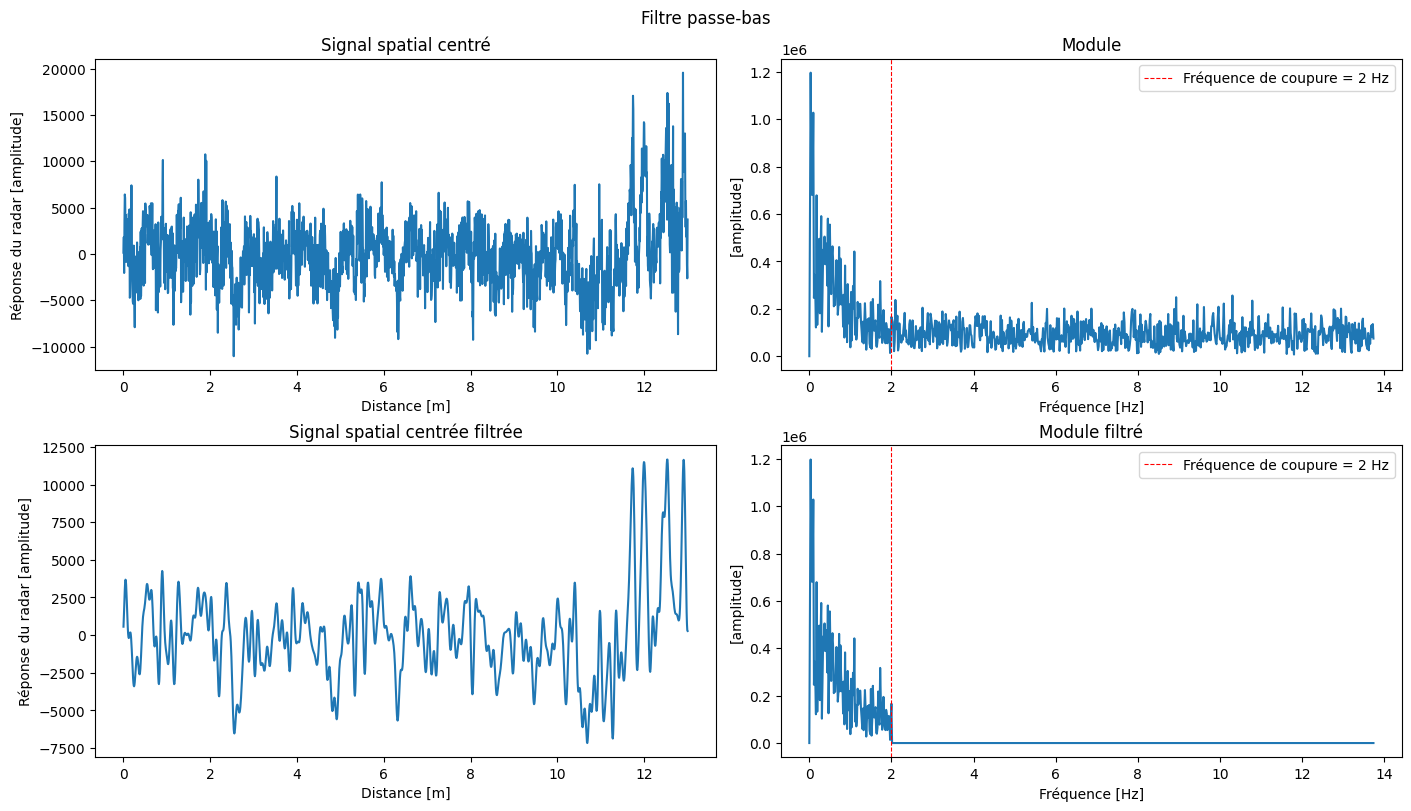

In [185]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8), layout="constrained")

ax[0, 0].plot(d, spatial_signal)
ax[0, 0].set_title("Signal spatial centré")
ax[0, 0].set_xlabel("Distance [m]")
ax[0, 0].set_ylabel("Réponse du radar [amplitude]")

ax[0, 1].plot(freq, module)
ax[0, 1].set_title("Module")
ax[0, 1].set_xlabel("Fréquence [Hz]")
ax[0, 1].set_ylabel("[amplitude]")
ax[0, 1].axvline(2, 0, 1, color="r", linestyle="--", linewidth=0.8, label="Fréquence de coupure = 2 Hz")
ax[0, 1].legend()

ax[1, 0].plot(d, spatial_signal_low_pass)
ax[1, 0].set_title("Signal spatial centrée filtrée")
ax[1, 0].set_xlabel("Distance [m]")
ax[1, 0].set_ylabel("Réponse du radar [amplitude]")

ax[1, 1].plot(freq, module_low_pass)
ax[1, 1].set_title("Module filtré")
ax[1, 1].set_xlabel("Fréquence [Hz]")
ax[1, 1].set_ylabel("[amplitude]")
ax[1, 1].axvline(2, 0, 1, color="r", linestyle="--", linewidth=0.8, label="Fréquence de coupure = 2 Hz")
ax[1, 1].legend()

fig.suptitle("Filtre passe-bas")
plt.show()

Voici le résultat du passe-bas pour un signal selon l'axe spatial. On peut voir que les fréquences supérieures à 2 Hz ont été supprimées et par la même occasion, le bruit aussi.

Appliquons maintentant ce filtre sur l'ensemble du radargramme.

In [179]:
def noise(radargram):
    radargram_corrected = np.array([low_pass_filter(line, 2) for line in radargram])
    return radargram_corrected

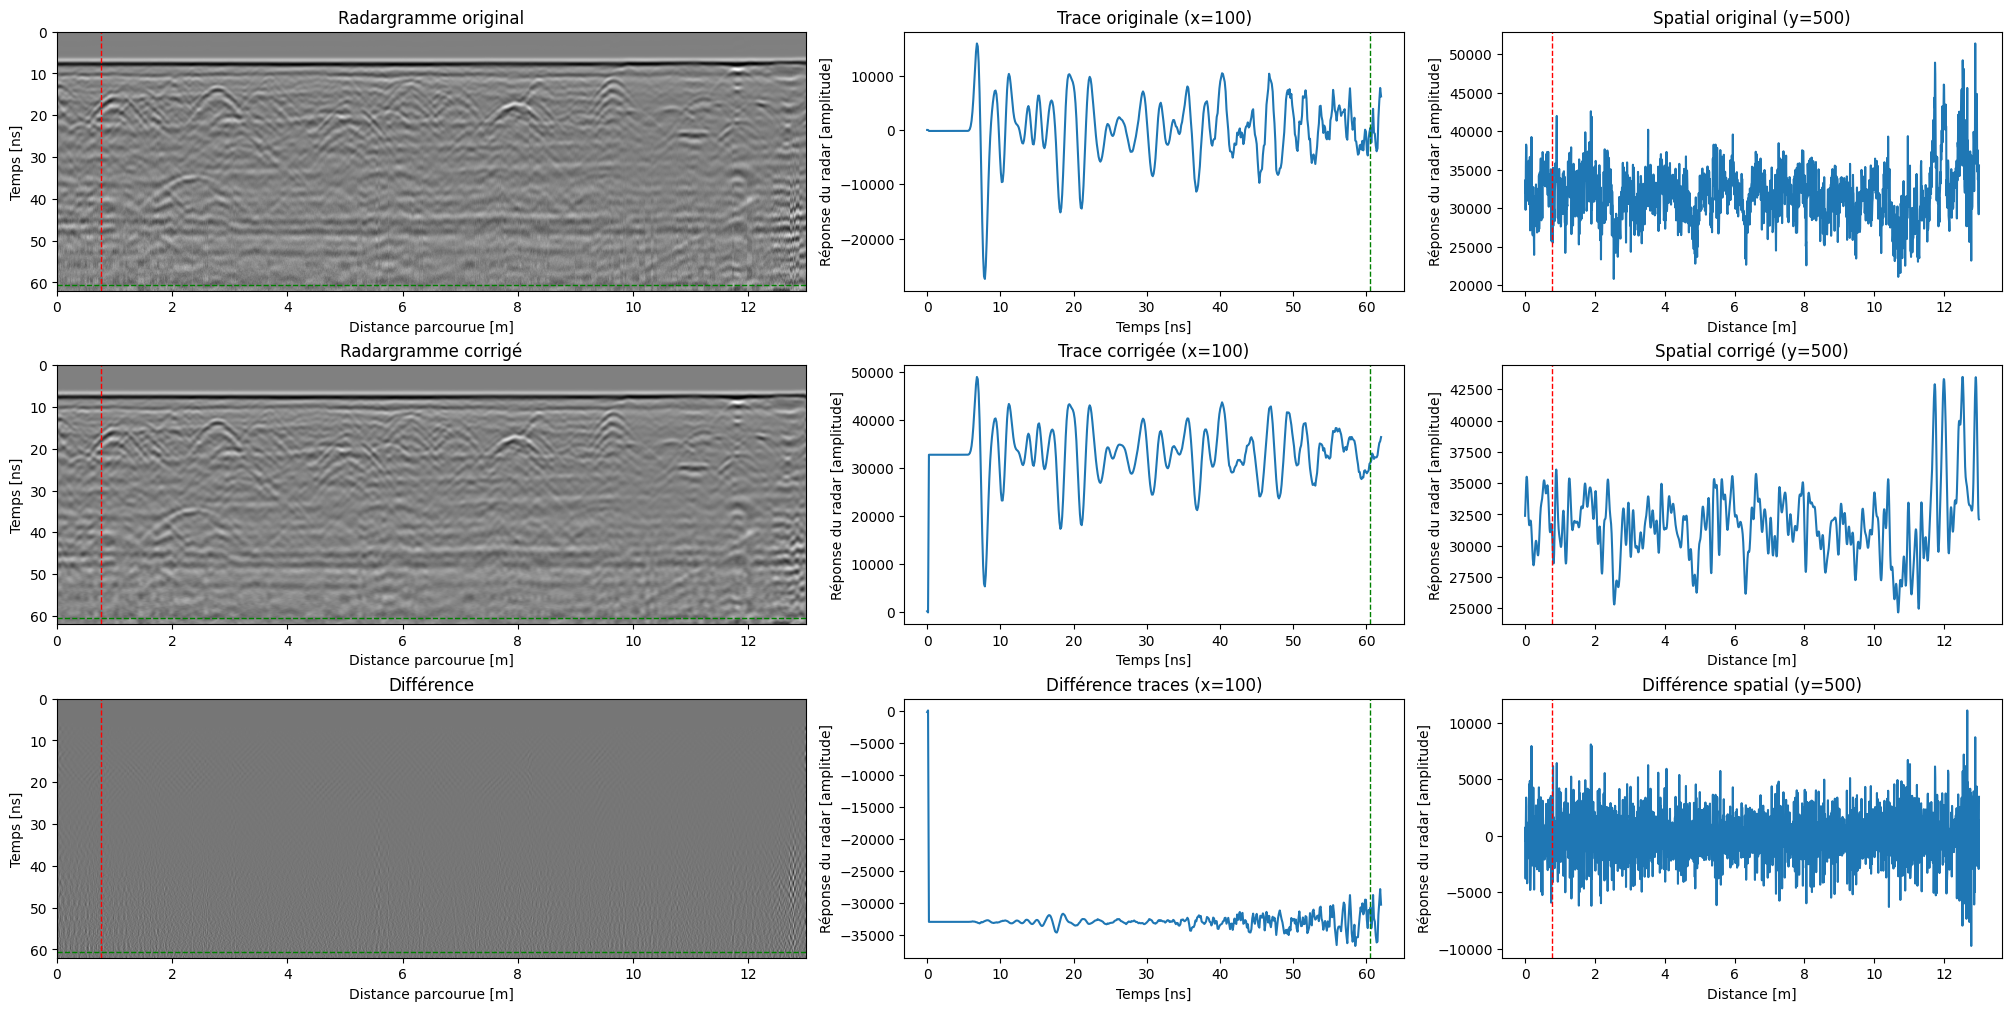

In [78]:
plot_radargram(radargram, noise(radargram), j=500)

On voit bien sur la différence de la trace que plus on est avancé dans le temps / profond, plus le filtre passe-bas est efficace. 

Il est indispensable d'effectuer le filtre passe-bas sur l'axe spatial et non temporel.

En effet, sur **l'axe temporel**, les hautes fréquences ne sont pas réparties également sur tout le signal et se concentrent sur la fin. Appliquer un filtre passe-bas selon cet axe soustrait les hautes fréquences sur tout le signal et altère fortement la partie n'étant pas bruitée. 

Selon **l'axe spatial**, les hautes fréquences sont réparties sur tout le signal et alors le filtre est efficace sans trop détériorer le radiogramme.

## Radargramme reconstruction finale

In [80]:
def radargram_pipeline(radargram):
    radargram_corrected = ringing_clutter(radargram)
    radargram_corrected = noise(radargram_corrected)
    return radargram_corrected

In [81]:
radargram_corrected = radargram_pipeline(radargram)

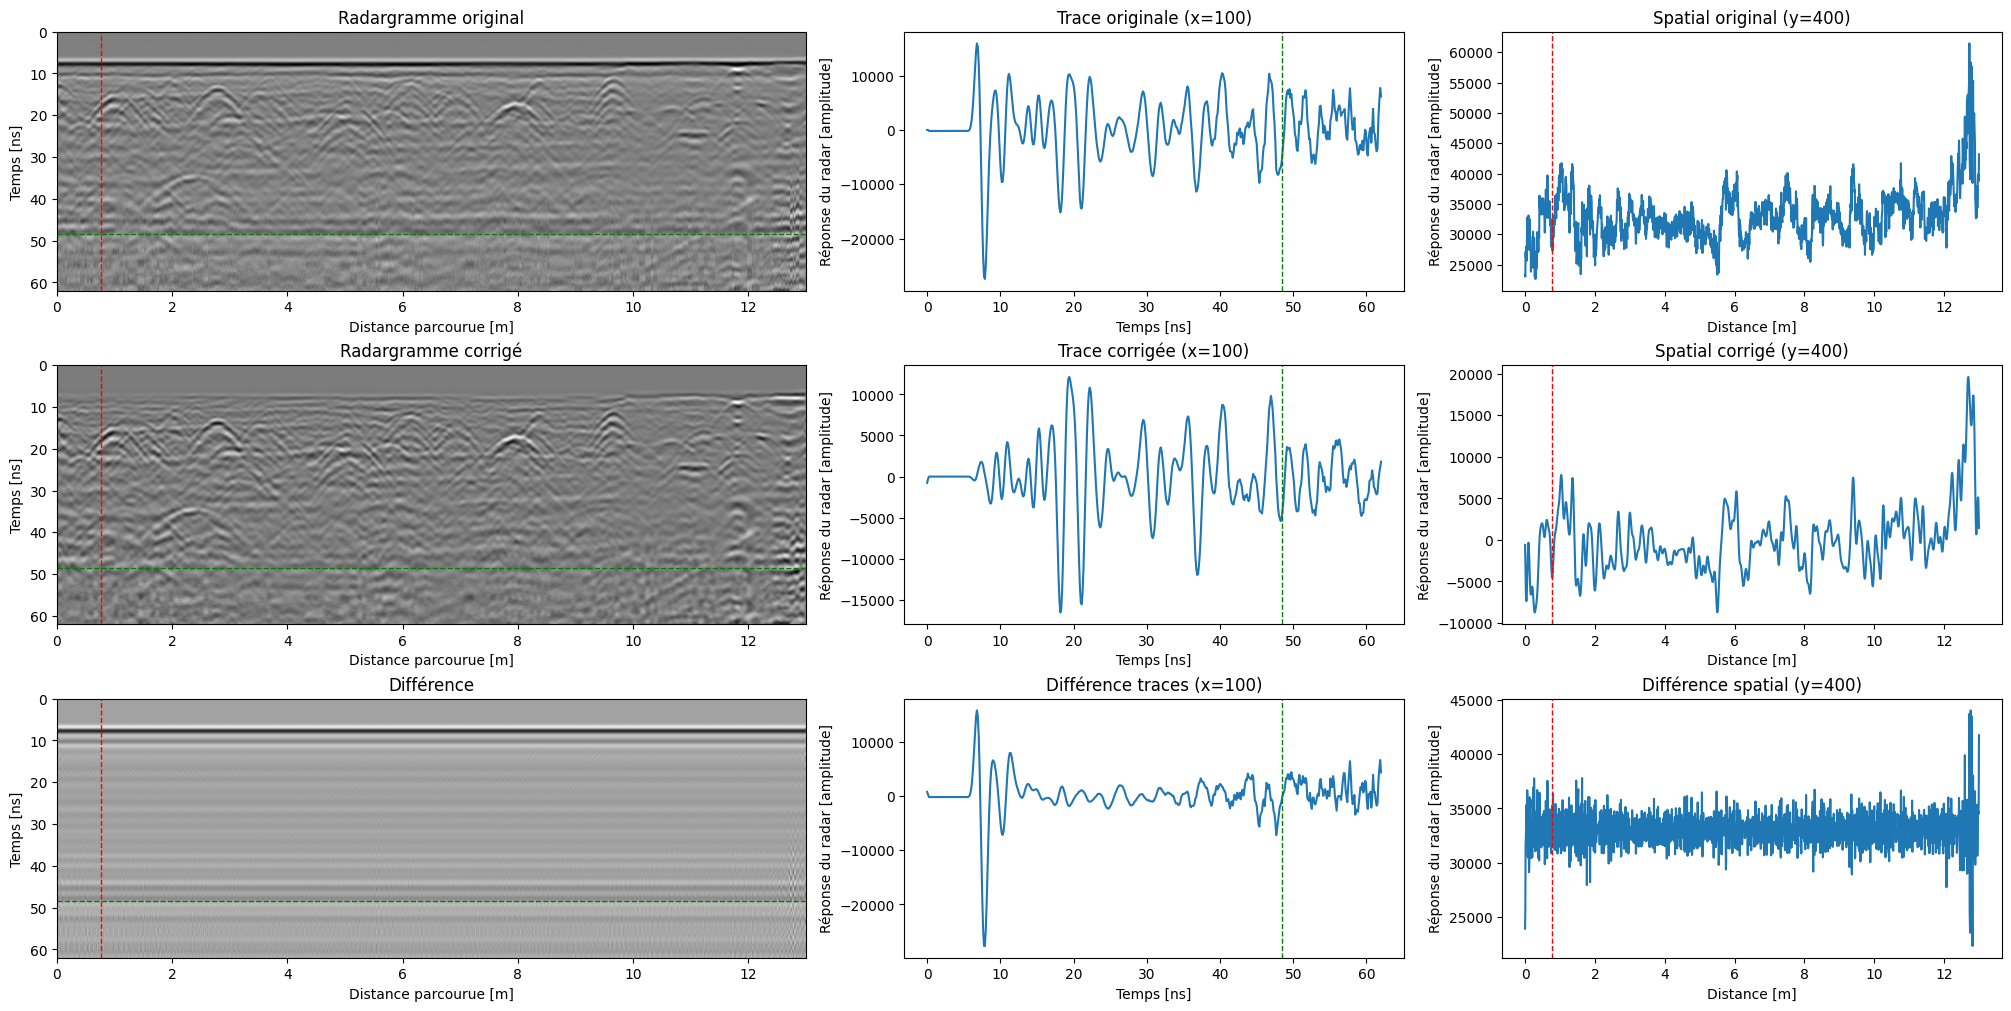

In [83]:
plot_radargram(radargram, radargram_corrected, j=400)


Sur le résultat ci-dessus, on peut observer plusieurs choses :
- Le ringing et clutter on bien été atténués.
- Le bruit a également diminué. On voit d'ailleurs bien sur le bas du radiogramme de différence, le bruit retiré.
- Les colonnes ont été également atténuées par le traitement du bruit.
- Grâce à ces traitements, les motifs intéressants dans le sol, ressortent bien mieux visuellement.